In [4]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Load .h5 file to get access to dataset</h2>

In [0]:
import tensorflow as tf
import h5py

In [7]:
h5_file = h5py.File('/content/gdrive/My Drive/AIML/Projects/DeepLearning2/SVHN_single_grey1.h5','r')
list(h5_file.keys())


['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [0]:
x_test = h5_file['X_test']
x_train = h5_file['X_train']
y_test = h5_file['y_test']
y_train = h5_file['y_train']
x_val = h5_file['X_val']
y_val = h5_file['y_val']

<h3>Inspect shapes of training ,test and validation set </h3>

There are 42k records in training set and 18k records in test set, but there are 60k records in validation set. Not sure why the validation set is higher than the training set

In [9]:
x_train.shape

(42000, 32, 32)

In [10]:
y_train.shape

(42000,)

In [11]:
x_test.shape

(18000, 32, 32)

In [12]:
y_test.shape

(18000,)

In [13]:
x_val.shape

(60000, 32, 32)

In [14]:
y_val.shape

(60000,)

<h3>Spot check images in training set</h3>

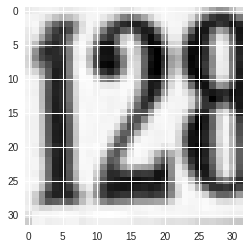

In [15]:
plt.imshow(x_train[0])

In [16]:
y_train[0]

2

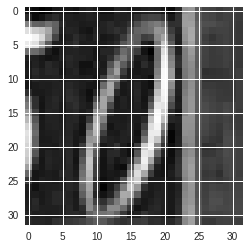

In [17]:
plt.imshow(x_train[278])

In [18]:
y_train[278]

0

<h3>View images in test set</h3>

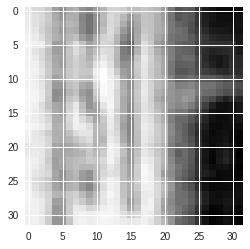

In [19]:
plt.imshow(x_test[0])

In [20]:
y_test[0]

1

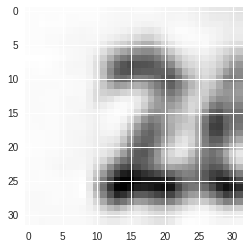

In [21]:
plt.imshow(x_test[17999])

In [22]:
y_test[17999]

2

<h3>Analyzing the DataSet object and converting to np array</h3>
There are 32 x 32 pixels here. Converting this 2-Dimensional to 1-Dimensional using reshare in numpy array for 42k records for train group and 18k records for test group

In [23]:
x_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [24]:
x_train.shape

(42000, 32, 32)

In [25]:
x_train[0].shape

(32, 32)

In [0]:
x_tr = np.array(x_train)

In [0]:
x_tr = x_tr.reshape(42000,32*32)

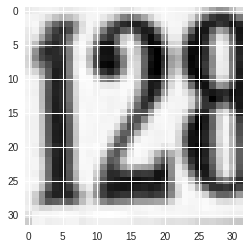

In [28]:
plt.imshow(x_train[0])

In [29]:
x_tr.shape

(42000, 1024)

In [30]:
y_tr = np.array(y_train)
print(y_tr.shape)
y_tr = y_tr.reshape(42000,1)

(42000,)


In [31]:
y_tr.shape

(42000, 1)

In [32]:
x_te = np.array(x_test)
print(x_te.shape)
x_te = x_te.reshape(18000,32*32)
print(x_te.shape)

(18000, 32, 32)
(18000, 1024)


In [33]:
y_te = np.array(y_test)
print(y_te.shape)
y_te = y_te.reshape(18000,1)
print(y_te.shape)

(18000,)
(18000, 1)


In [34]:
x_va = np.array(x_val)
print(x_va.shape)
x_va = x_va.reshape(60000,32*32)
print(x_va.shape)

(60000, 32, 32)
(60000, 1024)


In [35]:
y_va = np.array(y_val)
print(y_va.shape)
y_va = y_va.reshape(60000,1)
print(y_va.shape)

(60000,)
(60000, 1)


<h2>KNN Classifier</h2>

KNN Classifier is used to classify the image in test group into one of the 10 groups. KNN Classifier classifies the images based on the distance between the datapoints (which is pixels here). Hence scaling has to be done for the values

By default, 49% accuracy is achieved by using KNN Classifier. Classification Report and confusion matrix is printed for the same

In general, KNNClassifier takes a lot of time to evaluate as it tries to find the distance between points in 1024 dimensional planes. Since it takes time, it is very difficult to try out different options using GridSearchCV. For e.g, we can try with different algorithm, distance and number of neighbors

Tried with algorithm=kd_tree and n_neighbors=10 and an accuracy of 51.68% can be got

Accuracy and f1-score may increase if we use different hyperparameters with KNNClassifier, but in general, all these classical machine learning methods take a lot of time to evaluate and times out most of the times, thereby making it difficult to analyze with different parameters

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [0]:
x_tr = x_tr/255


In [0]:
x_va = x_va/255

In [0]:
x_te = x_te/255

In [40]:
x_tr[0]

array([0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
       0.20799099], dtype=float32)

In [41]:
y_tr[0]

array([2], dtype=uint8)

In [42]:
y_tr.ravel().shape

(42000,)

In [0]:
knn = KNeighborsClassifier()
knn.fit(x_tr,y_tr.ravel())
print(knn.score(x_te,y_te.ravel()))

0.49016666666666664


In [0]:
y_pr = knn.predict(x_te)
print(confusion_matrix(y_te,y_pr))
print(classification_report(y_te,y_pr))

[[1201   60   44   37   45   45  129   31  109  113]
 [ 125 1285   83   81   84   36   36   58   18   22]
 [ 126  252  932  115   44   44   28  128   69   65]
 [ 164  255  166  677   54  157   36   46   92   72]
 [ 148  256   47   61 1101   30   64   17   48   40]
 [ 196  179   91  261   43  637  130   31  114   86]
 [ 370  120   50   70  116  154  695   16  188   53]
 [ 135  254  138   78   23   26   26 1045   28   55]
 [ 330  140   71  118   84  109  256   20  592   92]
 [ 382  145   83  106   51   89   86   61  143  658]]
              precision    recall  f1-score   support

           0       0.38      0.66      0.48      1814
           1       0.44      0.70      0.54      1828
           2       0.55      0.52      0.53      1803
           3       0.42      0.39      0.41      1719
           4       0.67      0.61      0.64      1812
           5       0.48      0.36      0.41      1768
           6       0.47      0.38      0.42      1832
           7       0.72      0.58   

In [0]:
knn_opt = KNeighborsClassifier(n_neighbors=10,algorithm='kd_tree')
knn_opt.fit(x_tr,y_tr.ravel())
print(knn_opt.score(x_te,y_te.ravel()))

0.5168333333333334


In [42]:
'''Y_knnOpt_pr = knn_opt.predict(x_te)
print(classification_report(y_te,y_knnOpt_pr))
print(confusion_matrix(y_te,y_knnOpt_pr))'''

'Y_knnOpt_pr = knn_opt.predict(x_te)\nprint(classification_report(y_te,y_knnOpt_pr))\nprint(confusion_matrix(y_te,y_knnOpt_pr))'

<h3>Other models</h3>
Since all classical ML models take more time, the simplest NaiveBayes was tried and it was evaluated much faster. Apart from KNN, other models like LogisticRegression, NaiveBayes were tried and an accuracy of 20% and 15% were got. Classification report and confusion matrix for the same is also evaluated as below

In [0]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(x_tr,y_tr)
print(logr.score(x_te,y_te))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.20744444444444443


In [0]:
y_pr = logr.predict(x_te)
print(confusion_matrix(y_te,y_pr))
print(classification_report(y_te,y_pr))

[[439 151 145 111 163 117 179 202 182 125]
 [130 279 210 154 284 147 115 240 148 121]
 [175 105 456 151 193  95 131 229 150 118]
 [143 100 146 329 156 208 127 207 138 165]
 [197 138 161 146 507 193 103 136  88 143]
 [102 112 172 201 150 326 128 205 220 152]
 [145 122 163 178 179 197 328 223 156 141]
 [160 166 205 145 197 149 122 425 101 138]
 [126 119 225 182 151 186 198 158 342 125]
 [196 112 196 131 193 131 140 238 164 303]]
              precision    recall  f1-score   support

           0       0.24      0.24      0.24      1814
           1       0.20      0.15      0.17      1828
           2       0.22      0.25      0.23      1803
           3       0.19      0.19      0.19      1719
           4       0.23      0.28      0.25      1812
           5       0.19      0.18      0.19      1768
           6       0.21      0.18      0.19      1832
           7       0.19      0.24      0.21      1808
           8       0.20      0.19      0.20      1812
           9       0.20     

In [46]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_tr,y_tr)
print(mnb.score(x_te,y_te))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1575


In [47]:
y_pr = mnb.predict(x_te)
print(confusion_matrix(y_te,y_pr))
print(classification_report(y_te,y_pr))

[[531 122 107  92  57  72  92 515 117 109]
 [405 160 104  84 105 126 102 450 142 150]
 [157 234 281 155  98  97 124 283 187 187]
 [193 169 158 280  75 182  77 287 161 137]
 [632  53  47  59 349  57  57 471  17  70]
 [223 127 181 192  67 335  90 327 132  94]
 [396 117 189  90  75 294 212 347  38  74]
 [220 171  90 120 119 118 142 441  44 343]
 [354 101 269  79  65 344 110 333  87  70]
 [438 167 107  95  52 127  86 534  39 159]]
              precision    recall  f1-score   support

           0       0.15      0.29      0.20      1814
           1       0.11      0.09      0.10      1828
           2       0.18      0.16      0.17      1803
           3       0.22      0.16      0.19      1719
           4       0.33      0.19      0.24      1812
           5       0.19      0.19      0.19      1768
           6       0.19      0.12      0.15      1832
           7       0.11      0.24      0.15      1808
           8       0.09      0.05      0.06      1812
           9       0.11     

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [44]:
'''gbc = GradientBoostingClassifier()
gbc.fit(x_tr,y_tr.ravel())
gbc.score(x_te,y_te.ravel())
y_gbc_pr = gbc.predict(x_te)
print(classification_report(y_te,y_gbc_pr))'''

'gbc = GradientBoostingClassifier()\ngbc.fit(x_tr,y_tr.ravel())\ngbc.score(x_te,y_te.ravel())\ny_gbc_pr = gbc.predict(x_te)\nprint(classification_report(y_te,y_gbc_pr))'

In [45]:
'''xgb = XGBClassifier()
xgb.fit(x_tr,y_tr)
xgb.score(x_te,y_te)
y_xgb_pr = xgb.predict(x_te)
print(classification_report(y_te,y_xgb_pr))'''

'xgb = XGBClassifier()\nxgb.fit(x_tr,y_tr)\nxgb.score(x_te,y_te)\ny_xgb_pr = xgb.predict(x_te)\nprint(classification_report(y_te,y_xgb_pr))'

<h2>Deep Neural Networks</h2>

Since classicial ML models provide only around 50% accuracy and f1-score, deep neural networks can be tried which can yield better results. Hence, the data from the original .h5 file is of DataSet type and it has to be transformed to numpy array so that it can be reshaped and used with deep neural networks

<h4>Transformation of DataSet to numpy array and reshape as required</h4>

In [43]:
x_train.shape

(42000, 32, 32)

In [0]:
X_train = np.array(x_train)/255

In [45]:
X_train.shape

(42000, 32, 32)

In [46]:
X_train[0]

array([[0.12968785, 0.11866706, 0.10530196, ..., 0.2801847 , 0.2283153 ,
        0.16860352],
       [0.09893451, 0.10020902, 0.1175549 , ..., 0.4432192 , 0.40534863,
        0.33056822],
       [0.10304902, 0.08868118, 0.15873058, ..., 0.44432473, 0.47754902,
        0.45263842],
       ...,
       [0.11196157, 0.14200786, 0.17678471, ..., 0.09465059, 0.09840274,
        0.10219726],
       [0.15072627, 0.10381687, 0.09126157, ..., 0.11023294, 0.11556196,
        0.11790627],
       [0.19724864, 0.10226392, 0.0942702 , ..., 0.19477727, 0.19942354,
        0.20799099]], dtype=float32)

In [47]:
y_train.shape

(42000,)

In [48]:
Y_train = np.array(y_train).reshape(42000,1)
Y_train

array([[2],
       [6],
       [7],
       ...,
       [7],
       [0],
       [4]], dtype=uint8)

In [49]:
Y_train.shape

(42000, 1)

In [50]:
x_test.shape

(18000, 32, 32)

In [51]:
X_test = np.array(x_test)/255
X_test.shape

(18000, 32, 32)

In [52]:
y_test.shape

(18000,)

In [53]:
np.array(y_test)

array([1, 7, 2, ..., 7, 9, 2], dtype=uint8)

In [54]:
Y_test = np.array(y_test).reshape(18000,1)
Y_test

array([[1],
       [7],
       [2],
       ...,
       [7],
       [9],
       [2]], dtype=uint8)

In [55]:
x_val.shape

(60000, 32, 32)

In [56]:
X_val = np.array(x_val)/255
X_val.shape

(60000, 32, 32)

In [57]:
y_val.shape

(60000,)

In [58]:
Y_val = np.array(y_val).reshape(60000,1)
Y_val.shape

(60000, 1)

<h4>Neural Network models with no hidden layers</h4>
<li>Sequential model is initialized and the below layers are added
<li>The first model is built with no hidden layers, hence just add only the input layer and the output layer
<li>Reshape the model is done to ensure it is converted to 1-Dimensional
<li>1 Output layer is built with softmax activation as there are 10 output classes
<li>Stochastic Gradient Descent (SGD) is applied with learning rate = 0.03
<li>Model is compiled with categorical_crossentropy and with accuracy metrics
<li>Accuracy and f1-score of 10% is obtained on an average
<li>Classification report and confusion matrix is also printed for this neural network model
  

In [66]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32),))

#Normalize the data
#model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Output after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)


#Compile the model
model.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test), 
          epochs=25,
          batch_size=X_train.shape[1])

Y_NoHidden_pred = model.predict(X_test)

Instructions for updating:
Colocations handled automatically by placer.
Train on 42000 samples, validate on 18000 samples
Epoch 1/25
42000/42000 [==============================] - 3s 68us/sample - loss: 2.3668 - acc: 0.1118 - val_loss: 2.3943 - val_acc: 0.1022
Epoch 2/25
42000/42000 [==============================] - 2s 53us/sample - loss: 2.3441 - acc: 0.1305 - val_loss: 2.4225 - val_acc: 0.1011
Epoch 3/25
42000/42000 [==============================] - 2s 53us/sample - loss: 2.3354 - acc: 0.1390 - val_loss: 2.3296 - val_acc: 0.1537
Epoch 4/25
42000/42000 [==============================] - 2s 54us/sample - loss: 2.3325 - acc: 0.1459 - val_loss: 2.3839 - val_acc: 0.1281
Epoch 5/25
42000/42000 [==============================] - 2s 54us/sample - loss: 2.3285 - acc: 0.1482 - val_loss: 2.3980 - val_acc: 0.1414
Epoch 6/25
42000/42000 [==============================] - 2s 53us/sample - loss: 2.3251 - acc: 0.1503 - val_loss: 2.3743 - val_acc: 0.1286
Epoch 7/25
42000/42000 [====================

<h4>Small function to convert softmax output with probabilities to real output</h4>

In [0]:
Z_NoHidden_pred = []
for i in np.arange(0,Y_NoHidden_pred.shape[0]):
  Z_NoHidden_pred.append(np.argmax(Y_NoHidden_pred[i]))

In [68]:
print(accuracy_score(Y_test,Z_NoHidden_pred))
print(confusion_matrix(Y_test,Z_NoHidden_pred))
print(classification_report(Y_test,Z_NoHidden_pred))

0.10311111111111111
[[  53    0    5 1723    0    0    2    1   29    1]
 [  21    0    5 1765   11    0    2    0   24    0]
 [  20    0   77 1666    4    0    1    3   32    0]
 [   9    0    9 1663    5    2    0    4   26    1]
 [  31    0    2 1731   27    2    0    0   19    0]
 [  10    0    6 1694   15    3    2    0   38    0]
 [   8    0    9 1779    4    1    1    0   30    0]
 [   9    0    4 1740   15    1    1    1   37    0]
 [  15    0   14 1743    6    2    1    1   30    0]
 [  41    0    6 1707   13    3    7    0   26    1]]
              precision    recall  f1-score   support

           0       0.24      0.03      0.05      1814
           1       0.00      0.00      0.00      1828
           2       0.56      0.04      0.08      1803
           3       0.10      0.97      0.18      1719
           4       0.27      0.01      0.03      1812
           5       0.21      0.00      0.00      1768
           6       0.06      0.00      0.00      1832
           7    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<h4>Spot check a particular data</h4>
<li>Verify the images of first test data using plt.imshow
<li>Model's predicted output for first test data
<li>Since the accuracy is only around 10%, predicted output is not correct

In [69]:
np.argmax(Y_NoHidden_pred[0])

3

In [70]:
Z_NoHidden_pred[0]

3

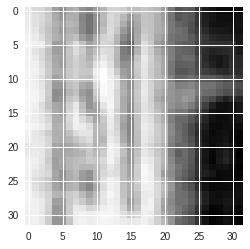

In [71]:
plt.imshow(X_test[0])

In [72]:
Y_test[0]

array([1], dtype=uint8)

In [73]:
Z_NoHidden_pred[0]

3

<h3>One hiddden layer with 100 nodes</h3>

<h4>Neural Network models with one hidden layer of 100 nodes</h4>
<li>Sequential model is initialized and the below layers are added
<li>The model is built with input layer
<li>Reshape the model is done to ensure it is converted to 1-Dimensional
<li>Relu activation layer with 100 nodes is added
<li>Batch normalization is added after the above layer to ensure normalization is done before sending to output layer
<li>1 Output layer is built with softmax activation as there are 10 output classes
<li>Stochastic Gradient Descent (SGD) is applied with learning rate = 0.03
<li>Model is compiled with categorical_crossentropy and with accuracy metrics
<li>Accuracy and f1-score of 43% is obtained on an average
<li>Classification report and confusion matrix is also printed for this neural network model  

In [68]:
#Initialize Sequential model
model1 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D
model1.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32),))

#Normalize the data
#model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer with 100 nodes with activation function as relu
model1.add(tf.keras.layers.Dense(100, activation='relu'))

#Normalize the data
model1.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Output after applying softmax
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)


#Compile the model
model1.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model1.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test), 
          epochs=25,
          batch_size=X_train.shape[1])

Y_1Hidden_pred = model1.predict(X_test)

Z_1Hidden_pred = []
for i in np.arange(0,Y_1Hidden_pred.shape[0]):
  Z_1Hidden_pred.append(np.argmax(Y_1Hidden_pred[i]))
 
print(accuracy_score(Y_test,Z_1Hidden_pred))
print(confusion_matrix(Y_test,Z_1Hidden_pred))
print(classification_report(Y_test,Z_1Hidden_pred))

Train on 42000 samples, validate on 18000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
42000/42000 [==============================] - 6s 137us/sample - loss: 2.2965 - acc: 0.1485 - val_loss: 2.2959 - val_acc: 0.1609
Epoch 2/25
42000/42000 [==============================] - 5s 128us/sample - loss: 2.2160 - acc: 0.2027 - val_loss: 2.2552 - val_acc: 0.1540
Epoch 3/25
42000/42000 [==============================] - 5s 130us/sample - loss: 2.2192 - acc: 0.2042 - val_loss: 2.2573 - val_acc: 0.1779
Epoch 4/25
42000/42000 [==============================] - 5s 127us/sample - loss: 2.2376 - acc: 0.1986 - val_loss: 2.2544 - val_acc: 0.1909
Epoch 5/25
42000/42000 [==============================] - 5s 128us/sample - loss: 2.2199 - acc: 0.2063 - val_loss: 2.2011 - val_acc: 0.2117
Epoch 6/25
42000/42000 [==============================] - 5s 109us/sample - loss: 2.1854 - acc: 0.2129 - val_loss: 2.1924 - val_acc: 0.1957
Epoch 7/25
42000/42000 [==============================] - 4s 1

<h3>Two Hidden layer Neural Network</h3>
<h4>Neural Network models with two hidden layers of 100 and 50 nodes</h4>
<li>Sequential model is initialized and the below layers are added
<li>The model is built with input layer and reshape the input layer by converting to 1-Dimensional
<li>1st hidden layer with Relu activation layer of 100 nodes are added
<li>Batch normalization is done before sending it to the second hidden layer
<li>2nd hidden layer with Relu activation layer of 50 nodes are added
<li>Batch normalization is done before sending it to the output layer
<li>1 Output layer is built with softmax activation as there are 10 output classes
<li>Stochastic Gradient Descent (SGD) is applied with learning rate = 0.03
<li>Model is compiled with categorical_crossentropy and with accuracy metrics
<li>Accuracy and f1-score of 54% is obtained on an average
<li>Classification report and confusion matrix is also printed for this neural network model  

In [69]:
#Initialize Sequential model
model2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D
model2.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32),))


#Add Dense Layer with 100 nodes applying relu
model2.add(tf.keras.layers.Dense(100, activation='relu'))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer with 50 nodes applying relu
model2.add(tf.keras.layers.Dense(50, activation='relu'))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Output after applying softmax
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model2.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test), 
          epochs=25,
          batch_size=32)

Y_2Hidden_pred = model2.predict(X_test)

Z_2Hidden_pred = []
for i in np.arange(0,Y_2Hidden_pred.shape[0]):
  Z_2Hidden_pred.append(np.argmax(Y_2Hidden_pred[i]))
 
print(accuracy_score(Y_test,Z_2Hidden_pred))
print(confusion_matrix(Y_test,Z_2Hidden_pred))
print(classification_report(Y_test,Z_2Hidden_pred))

Train on 42000 samples, validate on 18000 samples
Epoch 1/25
42000/42000 [==============================] - 6s 139us/sample - loss: 1.6944 - acc: 0.4349 - val_loss: 2.2729 - val_acc: 0.3091
Epoch 2/25
42000/42000 [==============================] - 5s 131us/sample - loss: 1.4503 - acc: 0.5208 - val_loss: 3.1812 - val_acc: 0.1676
Epoch 3/25
42000/42000 [==============================] - 5s 130us/sample - loss: 1.4780 - acc: 0.5141 - val_loss: 1.9791 - val_acc: 0.3523
Epoch 4/25
42000/42000 [==============================] - 5s 129us/sample - loss: 1.3667 - acc: 0.5540 - val_loss: 1.7672 - val_acc: 0.4297
Epoch 5/25
42000/42000 [==============================] - 5s 128us/sample - loss: 1.3048 - acc: 0.5799 - val_loss: 1.4485 - val_acc: 0.5315
Epoch 6/25
42000/42000 [==============================] - 5s 126us/sample - loss: 1.2787 - acc: 0.5896 - val_loss: 1.7214 - val_acc: 0.4516
Epoch 7/25
42000/42000 [==============================] - 5s 127us/sample - loss: 1.2524 - acc: 0.6009 - val_l

In [70]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               102500    
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 100)               400       
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 50)                200       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 108,660
Trainable params: 108,360
Non-trainable params: 300
_________________________________________________________________


<h3>Four Hidden layer Neural Networks</h3>
<h4>Neural Network models with four hidden layers of 10000, 1000, 500 and 100 nodes</h4>
<li>Sequential model is initialized and the below layers are added
<li>The model is built with input layer and reshape the input layer by converting to 1-Dimensional
<li>1st hidden layer with Relu activation layer of 10000 nodes are added
<li>Batch normalization is done before sending it to the second hidden layer
<li>2nd hidden layer with Relu activation layer of 1000 nodes are added
<li>Batch normalization is done before sending it to the next layer
<li>3rd hidden layer with Relu activation layer of 500 nodes are added
<li>Batch normalization is done before sending it to the next layer
<li>4th hidden layer with sigmoid activation layer of 100 nodes are added
<li>Batch normalization is done before sending it to the output layer
<li>1 Output layer is built with softmax activation as there are 10 output classes
<li>Stochastic Gradient Descent (SGD) is applied with learning rate = 0.03
<li>Model is compiled with categorical_crossentropy and with accuracy metrics
<li>Accuracy and f1-score of 67% is obtained on an average
<li>Classification report and confusion matrix is also printed for this neural network model  

In [71]:
#Initialize Sequential model
model3 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D
model3.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32),))


#Add Dense Layer with 10000 nodes with relu activation
model3.add(tf.keras.layers.Dense(10000, activation='relu'))

#Normalize the data
model3.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer with 1000 nodes with relu activation
model3.add(tf.keras.layers.Dense(1000, activation='relu'))

#Normalize the data
model3.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer with 500 nodes with relu activation
model3.add(tf.keras.layers.Dense(500, activation='relu'))

#Normalize the data
model3.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer with 100 nodes with sigmoid activation
model3.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Normalize the data
model3.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 1 Output after applying softmax
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model3.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model3.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test), 
          epochs=25,
          batch_size=52)

Y_3Hidden_pred = model3.predict(X_test)

Z_3Hidden_pred = []
for i in np.arange(0,Y_3Hidden_pred.shape[0]):
  Z_3Hidden_pred.append(np.argmax(Y_3Hidden_pred[i]))
 
print(accuracy_score(Y_test,Z_3Hidden_pred))
print(confusion_matrix(Y_test,Z_3Hidden_pred))
print(classification_report(Y_test,Z_3Hidden_pred))

Train on 42000 samples, validate on 18000 samples
Epoch 1/25
42000/42000 [==============================] - 212s 5ms/sample - loss: 1.3564 - acc: 0.5531 - val_loss: 1.8899 - val_acc: 0.3652
Epoch 2/25
42000/42000 [==============================] - 211s 5ms/sample - loss: 1.2792 - acc: 0.5790 - val_loss: 2.9047 - val_acc: 0.1497
Epoch 3/25
42000/42000 [==============================] - 210s 5ms/sample - loss: 1.3608 - acc: 0.5515 - val_loss: 2.5132 - val_acc: 0.1808
Epoch 4/25
42000/42000 [==============================] - 208s 5ms/sample - loss: 1.2291 - acc: 0.6007 - val_loss: 2.4996 - val_acc: 0.2291
Epoch 5/25
42000/42000 [==============================] - 209s 5ms/sample - loss: 1.0829 - acc: 0.6518 - val_loss: 2.1582 - val_acc: 0.3621
Epoch 6/25
42000/42000 [==============================] - 210s 5ms/sample - loss: 1.0106 - acc: 0.6796 - val_loss: 1.6842 - val_acc: 0.4467
Epoch 7/25
42000/42000 [==============================] - 209s 5ms/sample - loss: 0.9621 - acc: 0.6944 - val_l

In [72]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10000)             10250000  
_________________________________________________________________
batch_normalization_v1_3 (Ba (None, 10000)             40000     
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              10001000  
_________________________________________________________________
batch_normalization_v1_4 (Ba (None, 1000)              4000      
_________________________________________________________________
dense_8 (Dense)              (None, 500)               500500    
_________________________________________________________________
batch_normalization_v1_5 (Ba (None, 500)               2000      
__________

<h3>7 hidden layers with SGD optimizer with learning rate = 0.03, decay rate = 0.01 and momentum=0.9</h3>

<h4>Neural Network models with seven hidden layers of 300, 200, 100,75,50,25 and 15 nodes</h4>
<li>Sequential model is initialized and the below layers are added
<li>The model is built with input layer and reshape the input layer by converting to 1-Dimensional
<li>1st hidden layer with Relu activation layer of 300 nodes are added
<li>Batch normalization is done before sending it to the second hidden layer
<li>2nd hidden layer with Relu activation layer of 200 nodes are added
<li>Batch normalization is done before sending it to the next layer
<li>3rd hidden layer with Relu activation layer of 100 nodes are added
<li>Batch normalization is done before sending it to the next layer
<li>4th hidden layer with sigmoid activation layer of 75 nodes are added
<li>Batch normalization is done before sending it to the next layer
<li>4th hidden layer with sigmoid activation layer of 50 nodes are added
<li>Batch normalization is done before sending it to the next layer
<li>4th hidden layer with sigmoid activation layer of 25 nodes are added
<li>Batch normalization is done before sending it to the next layer
<li>4th hidden layer with sigmoid activation layer of 15 nodes are added
<li>Batch normalization is done before sending it to the output layer
<li>1 Output layer is built with softmax activation as there are 10 output classes
<li>Stochastic Gradient Descent (SGD) is applied with learning rate = 0.03, decay rate = 0.01 and momentum = 0.9
<li>Model is compiled with categorical_crossentropy and with accuracy metrics
<li>Accuracy and f1-score of 80% is obtained on an average
<li>Classification report and confusion matrix is also printed for this neural network model  

In [78]:
#Initialize Sequential model
model4 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D
model4.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32),))


#Add Dense Layer with 300 nodes with relu activation
model4.add(tf.keras.layers.Dense(300, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer with 200 nodes with relu activation
model4.add(tf.keras.layers.Dense(200, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())


#Add Dense Layer with 100 nodes with relu activation
model4.add(tf.keras.layers.Dense(100, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())


#Add Dense Layer with 75 nodes with relu activation
model4.add(tf.keras.layers.Dense(75, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())

lrelu = keras.layers.LeakyReLU(alpha=0.3)

#Add Dense Layer with 50 nodes with relu activation
model4.add(tf.keras.layers.Dense(50, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer with 25 nodes with relu activation
model4.add(tf.keras.layers.Dense(25, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer with 15 nodes with relu activation
model4.add(tf.keras.layers.Dense(15, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())


#Add Dense Layer which provides 1 Output after applying softmax
model4.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03, decay=0.02, momentum=0.9)

#Compile the model
model4.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model4.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test), 
          epochs=40,
          batch_size=100)

Y_4Hidden_pred = model4.predict(X_test)

Z_4Hidden_pred = []
for i in np.arange(0,Y_4Hidden_pred.shape[0]):
  Z_4Hidden_pred.append(np.argmax(Y_4Hidden_pred[i]))
 
print(accuracy_score(Y_test,Z_4Hidden_pred))
print(confusion_matrix(Y_test,Z_4Hidden_pred))
print(classification_report(Y_test,Z_4Hidden_pred))

Train on 42000 samples, validate on 18000 samples
Epoch 1/40
42000/42000 [==============================] - 12s 284us/sample - loss: 2.1550 - acc: 0.2362 - val_loss: 2.0517 - val_acc: 0.2751
Epoch 2/40
42000/42000 [==============================] - 10s 229us/sample - loss: 1.6268 - acc: 0.4610 - val_loss: 1.6016 - val_acc: 0.4697
Epoch 3/40
42000/42000 [==============================] - 9s 220us/sample - loss: 1.3484 - acc: 0.5712 - val_loss: 1.6101 - val_acc: 0.4707
Epoch 4/40
42000/42000 [==============================] - 9s 211us/sample - loss: 1.1921 - acc: 0.6253 - val_loss: 1.3538 - val_acc: 0.5565
Epoch 5/40
42000/42000 [==============================] - 9s 215us/sample - loss: 1.0811 - acc: 0.6627 - val_loss: 1.1537 - val_acc: 0.6327
Epoch 6/40
42000/42000 [==============================] - 9s 217us/sample - loss: 1.0131 - acc: 0.6849 - val_loss: 1.2124 - val_acc: 0.6096
Epoch 7/40
42000/42000 [==============================] - 9s 217us/sample - loss: 0.9991 - acc: 0.6878 - val

In [79]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_15 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_101 (Dense)            (None, 300)               307500    
_________________________________________________________________
batch_normalization_v1_78 (B (None, 300)               1200      
_________________________________________________________________
dense_102 (Dense)            (None, 200)               60200     
_________________________________________________________________
batch_normalization_v1_79 (B (None, 200)               800       
_________________________________________________________________
dense_103 (Dense)            (None, 100)               20100     
_________________________________________________________________
batch_normalization_v1_80 (B (None, 100)               400       
__________

<h3>Non-SGD</h3>

<h3>Five Hidden layer Neural Networks with Adagrad</h3>
<h4>Neural Network models with five hidden layers of 100, 75, 50, 25 and 10 nodes</h4>
An accuracy of 77% is got as described below


In [0]:
import tensorflow as tf
import keras

In [62]:
#Initialize Sequential model
model4 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D
model4.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32),))


#Add Dense Layer with 10000 nodes with relu activation
model4.add(tf.keras.layers.Dense(100, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())


#Add Dense Layer with 1000 nodes with relu activation
model4.add(tf.keras.layers.Dense(50, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())


#Add Dense Layer with 500 nodes with relu activation
model4.add(tf.keras.layers.Dense(25, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())

lrelu = keras.layers.LeakyReLU(alpha=0.3)

#Add Dense Layer with 100 nodes with sigmoid activation
model4.add(tf.keras.layers.Dense(10, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())


#Add Dense Layer which provides 1 Output after applying softmax
model4.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model4.compile(optimizer='adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model4.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test), 
          epochs=25,
          batch_size=52)

Y_4Hidden_pred = model4.predict(X_test)

Z_4Hidden_pred = []
for i in np.arange(0,Y_4Hidden_pred.shape[0]):
  Z_4Hidden_pred.append(np.argmax(Y_4Hidden_pred[i]))
 
print(accuracy_score(Y_test,Z_4Hidden_pred))
print(confusion_matrix(Y_test,Z_4Hidden_pred))
print(classification_report(Y_test,Z_4Hidden_pred))

Train on 42000 samples, validate on 18000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
42000/42000 [==============================] - 6s 140us/sample - loss: 1.7943 - acc: 0.3851 - val_loss: 1.8498 - val_acc: 0.3626
Epoch 2/25
42000/42000 [==============================] - 5s 121us/sample - loss: 1.3662 - acc: 0.5710 - val_loss: 1.4506 - val_acc: 0.5256
Epoch 3/25
42000/42000 [==============================] - 5s 122us/sample - loss: 1.2285 - acc: 0.6176 - val_loss: 1.1168 - val_acc: 0.6619
Epoch 4/25
42000/42000 [==============================] - 5s 122us/sample - loss: 1.1348 - acc: 0.6500 - val_loss: 1.2615 - val_acc: 0.5838
Epoch 5/25
42000/42000 [==============================] - 5s 118us/sample - loss: 1.0798 - acc: 0.6666 - val_loss: 1.1628 - val_acc: 0.6416
Epoch 6/25
42000/42000 [==============================] - 5s 118us/sample - loss: 1.0414 - acc: 0.6778 - val_loss: 1.0266 - val_acc: 0.6829
Epoch 7/25
42000/42000 [==============================] - 5s 1

<h3>Six Hidden layer Neural Networks with Adagrad</h3>
<h4>Neural Network models with five hidden layers of 200,100, 75, 50, 25 and 10 nodes</h4>
An accuracy of 80% is got as given below


In [64]:
#Initialize Sequential model
model4 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D
model4.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32),))


#Add Dense Layer with 10000 nodes with relu activation
model4.add(tf.keras.layers.Dense(200, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer with 1000 nodes with relu activation
model4.add(tf.keras.layers.Dense(100, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())


#Add Dense Layer with 1000 nodes with relu activation
model4.add(tf.keras.layers.Dense(75, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())


#Add Dense Layer with 500 nodes with relu activation
model4.add(tf.keras.layers.Dense(50, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())

lrelu = keras.layers.LeakyReLU(alpha=0.3)

#Add Dense Layer with 100 nodes with sigmoid activation
model4.add(tf.keras.layers.Dense(25, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer with 100 nodes with sigmoid activation
model4.add(tf.keras.layers.Dense(10, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())


#Add Dense Layer which provides 1 Output after applying softmax
model4.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model4.compile(optimizer='adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model4.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test), 
          epochs=25,
          batch_size=52)

Y_4Hidden_pred = model4.predict(X_test)

Z_4Hidden_pred = []
for i in np.arange(0,Y_4Hidden_pred.shape[0]):
  Z_4Hidden_pred.append(np.argmax(Y_4Hidden_pred[i]))
 
print(accuracy_score(Y_test,Z_4Hidden_pred))
print(confusion_matrix(Y_test,Z_4Hidden_pred))
print(classification_report(Y_test,Z_4Hidden_pred))

Train on 42000 samples, validate on 18000 samples
Epoch 1/25
42000/42000 [==============================] - 9s 217us/sample - loss: 1.9395 - acc: 0.3116 - val_loss: 1.8403 - val_acc: 0.3531
Epoch 2/25
42000/42000 [==============================] - 8s 191us/sample - loss: 1.4443 - acc: 0.5384 - val_loss: 1.7797 - val_acc: 0.4113
Epoch 3/25
42000/42000 [==============================] - 8s 198us/sample - loss: 1.2497 - acc: 0.6098 - val_loss: 1.3464 - val_acc: 0.5815
Epoch 4/25
42000/42000 [==============================] - 9s 215us/sample - loss: 1.1124 - acc: 0.6556 - val_loss: 1.3135 - val_acc: 0.5688
Epoch 5/25
42000/42000 [==============================] - 8s 195us/sample - loss: 1.0387 - acc: 0.6803 - val_loss: 1.2382 - val_acc: 0.5987
Epoch 6/25
42000/42000 [==============================] - 8s 197us/sample - loss: 0.9913 - acc: 0.6918 - val_loss: 1.0471 - val_acc: 0.6709
Epoch 7/25
42000/42000 [==============================] - 8s 194us/sample - loss: 0.9376 - acc: 0.7092 - val_l

<h3>Seven Hidden layer Neural Networks with Adam optimizer</h3>
<h4>Neural Network models with five hidden layers of 300,200,100, 75, 50, 25 and 15 nodes</h4>
An accuracy of 75% is got as given below


In [66]:
#Initialize Sequential model
model4 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D
model4.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32),))


#Add Dense Layer with 10000 nodes with relu activation
model4.add(tf.keras.layers.Dense(300, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer with 1000 nodes with relu activation
model4.add(tf.keras.layers.Dense(200, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())


#Add Dense Layer with 1000 nodes with relu activation
model4.add(tf.keras.layers.Dense(100, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())


#Add Dense Layer with 500 nodes with relu activation
model4.add(tf.keras.layers.Dense(75, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())

lrelu = keras.layers.LeakyReLU(alpha=0.3)

#Add Dense Layer with 100 nodes with sigmoid activation
model4.add(tf.keras.layers.Dense(50, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer with 100 nodes with sigmoid activation
model4.add(tf.keras.layers.Dense(25, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer with 100 nodes with sigmoid activation
model4.add(tf.keras.layers.Dense(15, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())


#Add Dense Layer which provides 1 Output after applying softmax
model4.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model4.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test), 
          epochs=25,
          batch_size=52)

Y_4Hidden_pred = model4.predict(X_test)

Z_4Hidden_pred = []
for i in np.arange(0,Y_4Hidden_pred.shape[0]):
  Z_4Hidden_pred.append(np.argmax(Y_4Hidden_pred[i]))
 
print(accuracy_score(Y_test,Z_4Hidden_pred))
print(confusion_matrix(Y_test,Z_4Hidden_pred))
print(classification_report(Y_test,Z_4Hidden_pred))

Train on 42000 samples, validate on 18000 samples
Epoch 1/25
42000/42000 [==============================] - 16s 378us/sample - loss: 1.8353 - acc: 0.3649 - val_loss: 2.5936 - val_acc: 0.2801
Epoch 2/25
42000/42000 [==============================] - 14s 328us/sample - loss: 1.2871 - acc: 0.5876 - val_loss: 1.6197 - val_acc: 0.4634
Epoch 3/25
42000/42000 [==============================] - 14s 328us/sample - loss: 1.1013 - acc: 0.6509 - val_loss: 1.1795 - val_acc: 0.6238
Epoch 4/25
42000/42000 [==============================] - 15s 354us/sample - loss: 0.9858 - acc: 0.6893 - val_loss: 1.0438 - val_acc: 0.6592
Epoch 5/25
42000/42000 [==============================] - 14s 335us/sample - loss: 0.9365 - acc: 0.7037 - val_loss: 1.3733 - val_acc: 0.5776
Epoch 6/25
42000/42000 [==============================] - 14s 340us/sample - loss: 0.8943 - acc: 0.7178 - val_loss: 0.9469 - val_acc: 0.7046
Epoch 7/25
42000/42000 [==============================] - 14s 344us/sample - loss: 0.8619 - acc: 0.7294 

<h3>Seven Hidden layer Neural Networks with AdaDelta optimizer</h3>
<h4>Neural Network models with five hidden layers of 300,200,100, 75, 50, 25 and 15 nodes</h4>
An accuracy of 59% is got as given below


In [67]:
#Initialize Sequential model
model4 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D
model4.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32),))


#Add Dense Layer with 10000 nodes with relu activation
model4.add(tf.keras.layers.Dense(300, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer with 1000 nodes with relu activation
model4.add(tf.keras.layers.Dense(200, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())


#Add Dense Layer with 1000 nodes with relu activation
model4.add(tf.keras.layers.Dense(100, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())


#Add Dense Layer with 500 nodes with relu activation
model4.add(tf.keras.layers.Dense(75, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())

lrelu = keras.layers.LeakyReLU(alpha=0.3)

#Add Dense Layer with 100 nodes with sigmoid activation
model4.add(tf.keras.layers.Dense(50, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer with 100 nodes with sigmoid activation
model4.add(tf.keras.layers.Dense(25, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer with 100 nodes with sigmoid activation
model4.add(tf.keras.layers.Dense(15, activation='relu'))

#Normalize the data
model4.add(tf.keras.layers.BatchNormalization())


#Add Dense Layer which provides 1 Output after applying softmax
model4.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model4.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model4.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test), 
          epochs=25,
          batch_size=52)

Y_4Hidden_pred = model4.predict(X_test)

Z_4Hidden_pred = []
for i in np.arange(0,Y_4Hidden_pred.shape[0]):
  Z_4Hidden_pred.append(np.argmax(Y_4Hidden_pred[i]))
 
print(accuracy_score(Y_test,Z_4Hidden_pred))
print(confusion_matrix(Y_test,Z_4Hidden_pred))
print(classification_report(Y_test,Z_4Hidden_pred))

Train on 42000 samples, validate on 18000 samples
Epoch 1/25
42000/42000 [==============================] - 17s 403us/sample - loss: 1.8726 - acc: 0.3490 - val_loss: 2.9200 - val_acc: 0.1591
Epoch 2/25
42000/42000 [==============================] - 15s 365us/sample - loss: 1.3487 - acc: 0.5640 - val_loss: 1.8882 - val_acc: 0.4065
Epoch 3/25
42000/42000 [==============================] - 15s 362us/sample - loss: 1.2163 - acc: 0.6136 - val_loss: 1.5102 - val_acc: 0.4943
Epoch 4/25
42000/42000 [==============================] - 15s 364us/sample - loss: 1.1676 - acc: 0.6279 - val_loss: 1.4893 - val_acc: 0.5138
Epoch 5/25
42000/42000 [==============================] - 15s 365us/sample - loss: 1.1257 - acc: 0.6393 - val_loss: 1.3720 - val_acc: 0.5429
Epoch 6/25
42000/42000 [==============================] - 16s 373us/sample - loss: 1.1423 - acc: 0.6354 - val_loss: 1.9749 - val_acc: 0.4146
Epoch 7/25
42000/42000 [==============================] - 16s 373us/sample - loss: 1.0972 - acc: 0.6510 

In [68]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_8 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 300)               307500    
_________________________________________________________________
batch_normalization_v1_29 (B (None, 300)               1200      
_________________________________________________________________
dense_46 (Dense)             (None, 200)               60200     
_________________________________________________________________
batch_normalization_v1_30 (B (None, 200)               800       
_________________________________________________________________
dense_47 (Dense)             (None, 100)               20100     
_________________________________________________________________
batch_normalization_v1_31 (B (None, 100)               400       
__________

<h3>Summary</h3>

<h4>KNN Classifier</h4>

KNNClassifier is one of the classical ML methods used to classify the images into one of the 10 classes. After trying out different combinations, it gives an accuracy and f1-score of 50% which is not a good probability to classify the images

KNN basically uses distance between the points in N-Dimensional plane

Morover, with KNN, the issue was that, each iteration took a large amount of time which would increase the time to try out each and every combination of hyperparameters used for KNN

<h4>Deep Neural Network</h4>

Deep Neural Network makes use of multiple hidden layers with forward propagation and backward propagation using categorical entropy as the loss function. SGD (Stochastic Gradient Descent) is used as the optimizer for building the neural network

<h5>SGD Optimizer</h5>

<li>Initially, no hidden layer was used and only the input layers are connected to the output layer and accuracy/f1-score of 10% was built which is poor than the classicial ML KNN model

<li>With one hidden layer of 100 nodes between input and output layers, an accuracy/f1-score of 43% was built which is little less than the classical ML KNN model

<li>With two hidden layers of 100 and 50 nodes in each of the hidden layer between input and output layers, an accuracy/f1-score of 54% was built which is little better than the classical ML KNN model

<li>With four hidden layers of 10000, 1000, 500 and 100 nodes in each of the hidden layer between input and output layers, an accuracy/f1-score of 67% was built which is about 20% better than the classical ML KNN model
  
<li>With  seven hidden layers of 300, 200, 100, 75, 50, 25 and 15 nodes in each of the hidden layer between input and output layers, an accuracy/f1-score of 80% was built which is about 30% better than the classical ML KNN model. 
            <li>Learning rate of 0.03 was used -  This is to control the rate at which the training params are trained
            <li>Decay rate of 0.01 was used - This is to control the decay rate
            <li>Momentum of 0.9 was used - This is to accelerate during slope and siddle points

<h5>Adagrad Optimizer</h5>
              
<li>With five hidden layers of 200, 100, 50, 25 and 10 nodes in each of the hidden layer between input and output layers, an accuracy/f1-score of 77% was built 
  
<li>With six hidden layers of 300, 200, 100, 50, 25 and 10 nodes in each of the hidden layer between input and output layers, an accuracy/f1-score of 80% was built 
  
<h5>Adam Optimizer</h5>
  
<li>With seven hidden layers of 300, 200, 100, 75, 50, 25 and 15 nodes in each of the hidden layer between input and output layers, an accuracy/f1-score of 75% was built
  
<h5>AdaDelta Optimizer</h5>
  
<li>With seven hidden layers of 300, 200, 100, 75, 50, 25 and 15 nodes in each of the hidden layer between input and output layers, an accuracy/f1-score of 59% was built

Overall, accuracy/f1-score improves with the below actions:

<li>Increase the number of hidden layers
<li>Increase the number of nodes in each hidden layer
<li>Different combinations of optimizers
<li>Learning rate, decay rate and momentum is also used to achieve the best accuracy/f1-score
  
Max accuracy/f1-score of 80% model was built. It may be difficult to get an accuracy > 80% because of the fact that the samples has multiple numbers and some of them lacks clarity. Convolutional Neural Network (CNN) can yield better results (accuracy > 80%) for these images




In [82]:
Z_4Hidden_pred[2643]

7

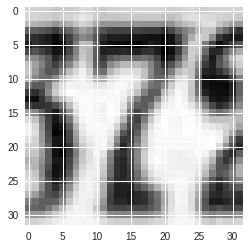

In [84]:
plt.imshow(X_test[2643])